# 0. Setup Paths

In [41]:
import os

In [42]:
#CUSTOM_MODEL_NAME = 'my_ssd_mobnet'
CUSTOM_MODEL_NAME = 'my_ssd_mobnet_5' #4th iteration model name
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [43]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [44]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [45]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [ ]:
# https://www.tensorflow.org/install/source_windows

# https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

# skip the entire STEP 1 after 1st iteration of training

In [46]:
if os.name=='nt':
    !pip install wget
    import wget

In [47]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [9]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

        1 file(s) moved.


tar: This does not look like a tar archive
tar: Skipping to next header
tar: Exiting with failure status due to previous errors


        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\flexible_grid_a

C:\Users\akinb\anaconda3\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
C:\Users\akinb\anaconda3\lib\site-packages\setuptools\command\easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-310: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-310: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-310: module MAY be using inspect.stack
C:\Users\akinb\anaconda3\lib\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning:  is an invalid version and will not be supported in a future release
  warnings.warn(
C:\Users\akinb\anaconda3\lib\site-packages\pkg_r

Obtaining file:///C:/Users/akinb/OneDrive/Desktop/tfod/TFODCourse/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py develop for slim


In [10]:
#!pip install tensorflow --upgrade

!pip uninstall tensorflow --y
!pip install tensorflow==2.13.0

Found existing installation: tensorflow 2.10.0
Uninstalling tensorflow-2.10.0:
  Successfully uninstalled tensorflow-2.10.0
  Using cached tensorflow-2.13.0-cp310-cp310-win_amd64.whl.metadata (2.6 kB)
  Using cached tensorflow_intel-2.13.0-cp310-cp310-win_amd64.whl.metadata (4.1 kB)
  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached tensorboard-2.13.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached keras-2.13.1-py3-none-any.whl.metadata (2.4 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl.metadata (2.7 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
Using cached tensorflow-2.13.0-cp310-cp310-win_amd64.whl (1.9 kB)
Using cached tensorflow_intel-2.13.0-cp310-cp310-win_amd64.whl (276.5 MB)
Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl (413 kB)
Using cac

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.16.0 requires gin-config, which is not installed.
tf-models-official 2.16.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.16.0 requires immutabledict, which is not installed.
tf-models-official 2.16.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.16.0 requires oauth2client, which is not installed.
tf-models-official 2.16.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.16.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.16.0 requires sentencepiece, which is not installed.
tf-models-official 2.16.0 requires seqeval, which is not installed.
tf-models-official 2.16.0 requires tensorflow-datasets, which is not installed.
tf-models-official 2.16.0 requires tensorflow-hub>=0.6.0, 

In [ ]:
#!pip uninstall tf-models-official --y
#!pip install tf-models-official==2.13

#!pip install tf-models-official

In [18]:
!pip install matplotlib

   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   -- ------------------------------------- 0.6/7.7 MB 17.6 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/7.7 MB 35.1 MB/s eta 0:00:01
   ---------------------------- ----------- 5.4/7.7 MB 43.3 MB/s eta 0:00:01
   ---------------------------------------  7.6/7.7 MB 44.4 MB/s eta 0:00:01
   ---------------------------------------- 7.7/7.7 MB 40.7 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.16.0 requires gin-config, which is not installed.
tf-models-official 2.16.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.16.0 requires immutabledict, which is not installed.
tf-models-official 2.16.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.16.0 requires oauth2client, which is not installed.
tf-models-official 2.16.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.16.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.16.0 requires sentencepiece, which is not installed.
tf-models-official 2.16.0 requires seqeval, which is not installed.
tf-models-official 2.16.0 requires tensorflow-datasets, which is not installed.
tf-models-official 2.16.0 requires tensorflow-hub>=0.6.0, 

In [15]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.20.1
Uninstalling protobuf-3.20.1:
  Successfully uninstalled protobuf-3.20.1
Found existing installation: matplotlib 3.7.0
Uninstalling matplotlib-3.7.0:
  Successfully uninstalled matplotlib-3.7.0
  Using cached matplotlib-3.2.0.tar.gz (40.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/420.9 kB ? eta -:--:--
   --------------------------------------  419.8/420.9 kB 27.3 MB/s eta 0:00:01
   ---------------------------------------- 420.9/420.9 kB 8.7 MB/s eta 0:00:00
  Running setup.py clean for matplotlib
Failed to build matplotlib


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [579 lines of output]
  
  Edit setup.cfg to change the build options; suppress output with --quiet.
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.2.0]
        python: yes [3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023,
                    18:18:15) [MSC v.1916 64 bit (AMD64)]]
      platform: yes [win32]
   sample_data: yes [installing]
         tests: no  [skipping due to configuration]
           agg: yes [installing]
         tkagg: yes [installing; run-time loading from Python Tcl/Tk]
        macosx: no  [Mac OS-X only]
  
  C:\Users\akinb\anaconda3\lib\site-packages\setuptools\dist.py:285: SetuptoolsDeprecationWarning: The namespace_packages parameter is deprecated, consider using implicit namespaces instead (PEP 420).
    warnings.warn(msg, SetuptoolsDeprecationWarning)
  running bdist_wheel
  running build
  running build_py
  creating build
  creati

In [16]:
!pip uninstall protobuf -y

#!pip install protobuf!==3.20
!pip install -v protobuf==3.20.1

Using pip 23.3 from C:\Users\akinb\anaconda3\lib\site-packages\pip (python 3.10)

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.55.1 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.55.1 requires fastavro<2,>=0.23.6, which is not installed.
apache-beam 2.55.1 requires fasteners<1.0,>=0.3, which is not installed.
apache-beam 2.55.1 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.55.1 requires httplib2<0.23.0,>=0.8, which is not installed.
apache-beam 2.55.1 requires js2py<1,>=0.74, which is not installed.
apache-beam 2.55.1 requires jsonpickle<4.0.0,>=3.0.0, which is not installed.
apache-beam 2.55.1 requires objsize<0.8.0,>=0.6.1, which is not installed.
apache-beam 2.55.1 requires orjson<4,>=3.9.7, which is not installed.
apache-beam 2.55.1 requires proto-plus<2,>=1.7.1, which is not installed.
apache-beam 2.55.1 requires pyarrow<12.0.0,>=3.0.0, which is not installed.
apache-beam 2.55.1 re


  Obtaining dependency information for protobuf==3.20.1 from https://files.pythonhosted.org/packages/c0/9c/bb88091287418ae1cf8af2bb9ed9710748a562b9abc227e4884d687a8650/protobuf-3.20.1-cp310-cp310-win_amd64.whl.metadata
  Using cached protobuf-3.20.1-cp310-cp310-win_amd64.whl.metadata (698 bytes)
Using cached protobuf-3.20.1-cp310-cp310-win_amd64.whl (903 kB)


In [ ]:
#!pip uninstall tf-keras --y
#!pip install tf-keras==2.14.1

In [13]:
!pip install yml

  Using cached yml-0.0.1-py3-none-any.whl


In [14]:
!pip install pyyaml

In [48]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.10.9: C:\Users\akinb\anaconda3\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W0410 19:13:52.828708 15264 batch_normalization.py:1531] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
C:\Users\akinb\anaconda3\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\builders\model_builder.py:1112: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'
W0410 19:13:53.191892 15264 model_builder.py:1112] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.64s
I0410 19:13:53.453207 15264 test_util.py:2462] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.64s
[       

In [9]:
import object_detection

In [8]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.3
anaconda-client               1.11.1
anaconda-cloud-auth           0.1.4
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt 

In [49]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

        1 file(s) moved.
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [50]:
labels = [{'name':'ok', 'id':1}, {'name':'nok', 'id':2}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [ ]:
# OPTIONAL IF RUNNING ON COLAB
#ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
#if os.path.exists(ARCHIVE_FILES):
#  !tar -zxvf {ARCHIVE_FILES}

In [51]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [ ]:
#!pip install pytz

In [52]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [53]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [54]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [55]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [56]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [57]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [58]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [59]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [ ]:
#!pip install cycler
#!pip install kiwisolver

In [37]:
#!pip install gin-config

  Using cached gin_config-0.5.0-py3-none-any.whl.metadata (2.9 kB)
Using cached gin_config-0.5.0-py3-none-any.whl (61 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.16.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.16.0 requires immutabledict, which is not installed.
tf-models-official 2.16.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.16.0 requires oauth2client, which is not installed.
tf-models-official 2.16.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.16.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.16.0 requires sentencepiece, which is not installed.
tf-models-official 2.16.0 requires seqeval, which is not installed.
tf-models-official 2.16.0 requires tensorflow-datasets, which is not installed.
tf-models-official 2.16.0 requires tensorflow-hub>=0.6.0, which is not installed.
tf-models-official 2.16.0 requires tensorflow-m

In [24]:
import matplotlib.pyplot as plt

In [60]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [61]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=3000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [62]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet_5 --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_5\pipeline.config --num_train_steps=3000


In [63]:
!{command}

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I0410 19:16:24.583948 24424 mirrored_strategy.py:419] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 3000
I0410 19:16:24.599280 24424 config_util.py:552] Maybe overwriting train_steps: 3000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0410 19:16:24.599280 24424 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0410 19:16:24.617279 24424 deprecation.py:364] From C:\Users\akinb\anaconda3\lib\site-packages\object_detection-0.1-py3.10.egg\object_detection\model_lib_v2.py:563: StrategyBase.experimental_distribute_datasets_from_function (from tensorflow.python.distribute.distribute_lib) is deprecated and will be removed in a future version.
Instructions for updating:
rename to distribute_datasets_from_function
INFO:ten

# 7. Evaluate the Model

In [64]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [65]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet_5 --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_5\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet_5


In [66]:
!{command}

creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.16s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.716
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.939
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.939
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.716
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.790
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.790
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.790
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000


W0410 20:39:58.033476 30168 model_lib_v2.py:1089] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0410 20:39:58.033476 30168 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0410 20:39:58.033476 30168 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0410 20:39:58.033476 30168 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0410 20:39:58.033476 30168 model_lib_v2.py:1106] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
INFO:tensorflow:Reading unweighted datasets: ['Tensorflow\\workspace\\annotations\\test.record']
I0410 20:39:58.101536 30168 dataset_builder.py:162] Reading unweighted datasets: ['Tensorflow\\workspace\\annotations\\test.record']
INFO:tensorflow:Reading

In [ ]:
# using tensorboard to view loss metrics - time: 2:30:00 (tutorial)
# tensorboard --logdir=.

# 8. Load Train Model From Checkpoint

In [67]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util
tf.config.run_functions_eagerly(True)

In [68]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-4')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [69]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [70]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [74]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'nok.f338f027-edd3-11ee-9619-14857f241877.jpg')

In [72]:
#IMAGE_PATH

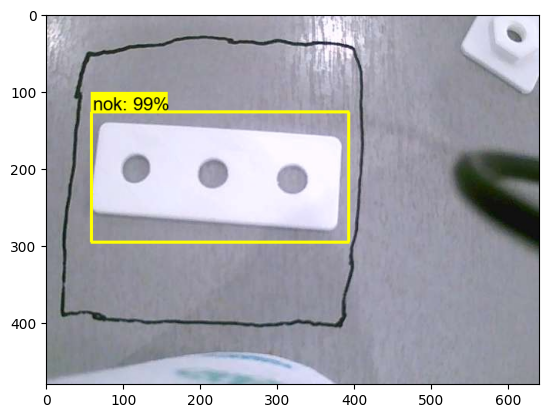

In [75]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.85, # will display boxes with min confidence level at 85%
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [ ]:
#!pip uninstall opencv-python-headless -y

In [77]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=2,
                min_score_thresh=.85,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [84]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [85]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [86]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


In [87]:
!{command}

2024-03-20 12:40:26.333897: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0320 12:40:26.906266 28660 deprecation.py:641] From C:\Users\akinb\OneDrive\Desktop\tfod\TFODCourse\tfod\lib\site-packages\tensorflow\python\autograph\impl\api.py:459: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
In

# 12. Conversion to TFLite

In [97]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [98]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [99]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport


In [100]:
!{command}

2024-03-20 13:07:07.610557: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


W0320 13:07:16.433179 47852 module_wrapper.py:149] From C:\Users\akinb\OneDrive\Desktop\tfod\TFODCourse\tfod\lib\site-packages\keras\src\backend.py:873: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

2024-03-20 13:07:16.437872: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.

W0320 13:07:17.042620 47852 module_wrapper.py:149] From C:\Users\akinb\OneDrive\Desktop\tfod\

In [101]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [102]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [103]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [104]:
!{command}

2024-03-20 13:10:29.199508: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

2024-03-20 13:10:36.104644: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-20 13:10:48.028123: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-03-20 13:10:48.028165: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-03-20 13:10:48.043602: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedMode

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')